<center>King Mongkut’s University of Technology Thonburi Faculty of Engineering</center>
<center>Department of Computer Engineering</center>
<center>CPE 342 Machine Learning, 1/2023</center>


<center>Student ID : 64070501039 Name : Peerapat Padtawaro</center>

---

**Assignment 1:** Trainning model


    

**Due:** 17 September 2023. Please submit your report in PDF to LEB2

**Introductoin**

One of the main problems in machine learning is to select suitable features
for the model to learn. Embedded learning is one of feature selection approaches
that aim to select suitable features and at the same time fit the model with data. In
this assignment, you will work on deriving and implementing the stochastic gradient
descent optimization on the logistic regression with ridge regularization. Logistic
regression with ridge regularization can be expressed in the following formula,

$$ f(x,w) = \sum_{i=1}^k (w_i - x_i) $$
$$ H_w(x,w) = \frac{1}{1 + e^{-f(x,w)}} $$

where x is the vector of input feature and w is the vector of the regression coefficient.
Error function for ridge regression can be expressed in the form of

$$ E(w)=L(w)+\lambda||w||_2 $$
$$ = L(w) + \lambda \sum_{i=1}^k w_i^2 $$ 

L(w) is the loss/error function of the model and lamda is a regularization parameter. Ridge
regularization will penalize the use of weight and the outcome of the optimization will
be a fitted model with minimal weight.

For demonstration, we will use a very simple iris dataset. The report needs to
address the following problems/tasks.

*Iris dataset: https://www.kaggle.com/arshid/iris-flower-dataset*

**Tasks (10 points)**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
IRIS = pd.read_csv('IRIS.csv')
df=pd.DataFrame(IRIS)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


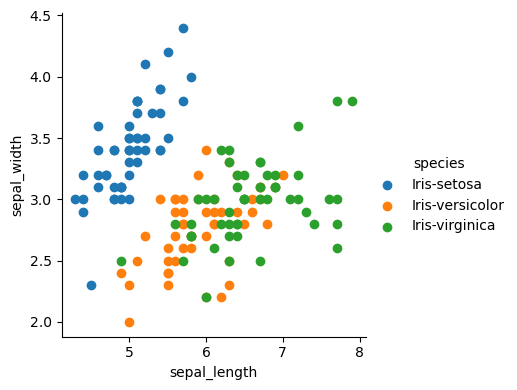

In [7]:
sns.FacetGrid(df, hue ="species", height=4, aspect=1).map(plt.scatter, 'sepal_length','sepal_width').add_legend()

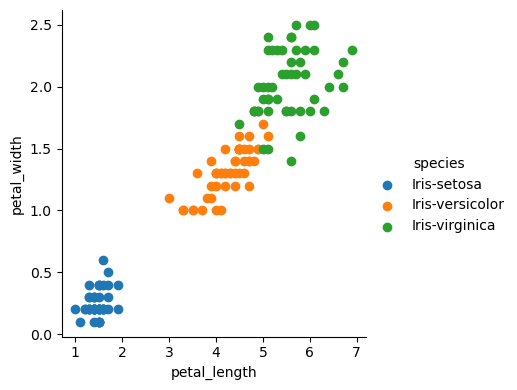

In [ ]:
sns.FacetGrid(df, hue ="species", height=4, aspect=1).map(plt.scatter, 'petal_length','petal_width').add_legend()

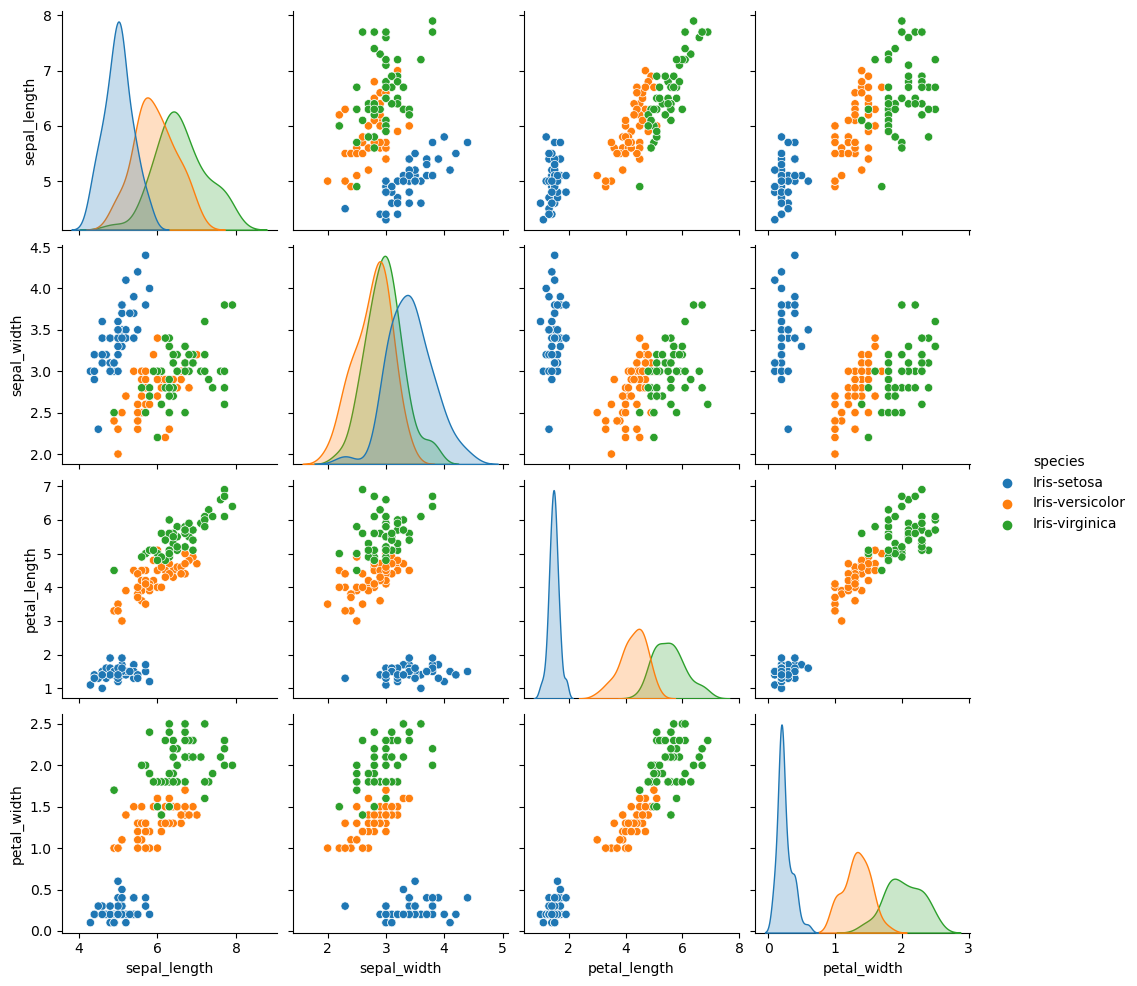

In [ ]:
sns.pairplot(df , hue='species');

In [8]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

1. *[1 point]* Prepare the data in one-against-the-rest strategy. This can be doneby converting the "Species" column into 3 binary columns.

In [9]:
def prepare_data(df):
    df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
    df['species_setosa'] = df['species'].map({0: 1, 1: 0, 2: 0})
    df['species_versicolor'] = df['species'].map({0: 0, 1: 1, 2: 0})
    df['species_virginica'] = df['species'].map({0: 0, 1: 0, 2: 1})
    return df

    function prepare_data is used to convert the species column into three columns of 0 and 1 values for each species type.

2. *[2 points]* Formulate the error function of the logistic regression with ridge regularization criterion.

In [1]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def error_function(X, y, theta, lamda):
    m = len(y)
    h = sigmoid(X.dot(theta))
    regularization_term = (lamda / (2 * m)) * np.sum(theta[1:] ** 2) 
    error = (-1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + regularization_term
    return error

    fuction sigmoid(z) is used to calculate the sigmoid function g(z) = 1/(1+e^-z) for logistic regression.    
    function error_function(X, y, theta, lamda) is used to calculate the error function J(θ) for logistic regression with regularization. 

3. *[2 points]* Derive the gradient of the error function by deriving the partial derivative of the error function in Task 2.

In [11]:
def compute_gradient(X, y, theta, lamda):
    m = len(y)
    h = 1 / (1 + np.exp(-X.dot(theta)))
    gradient = (1 / m) * X.T.dot(h - y) + (lamda / m) * theta
    gradient[0] -= (lamda / m) * theta[0]
    return gradient

    function compute_gradient(X, y, theta, lamda) is used to compute gradient of the cost function J(θ) for logistic regression with regularization. The gradient is returned as a vector of the same length as theta. 

4. *[2 point]* Implement the gradient descent using all of the dataset in each iteration. (Use equation from Task 3)

In [12]:
def gradient_descent(X, y, theta, lamda, alpha, iterations):
    m = len(y)
    error_history = []
    for i in range(iterations):
        theta = theta - (alpha * compute_gradient(X, y, theta, lamda))
        error_history.append(error_function(X, y, theta, lamda))
    return theta, error_history

    function gradient_descent(X, y, theta, lamda, alpha, iterations) is used to train the model and return the trained parameters and error history of the model. 

5. *[1 point]* Implement the stochastic gradient descent using the subset of dataset in each iteration. (Use equation from Task 3)

In [14]:
def stochastic_gradient_descent(X, y, theta, lamda, alpha, iterations, batch_size):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        batch_indices = np.random.choice(m, batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        
        gradient = compute_gradient(X_batch, y_batch, theta, lamda)
        theta -= alpha * gradient
        cost = error_function(X_batch, y_batch, theta, lamda)
        cost_history.append(cost)

    return theta, cost_history

    from all of the functions above, we can now train the model

6. *[1 point]* Test to see the effect of lambda on the training process.

In [15]:
def test_lamda(X, y, theta, alpha, iterations, batch_size, lamda_list):
    cost_history_list = []
    for lamda in lamda_list:
        theta, cost_history = stochastic_gradient_descent(X, y, theta, lamda, alpha, iterations, batch_size)
        cost_history_list.append(cost_history)
    return theta, cost_history_list

lamda = 0
theta = [-0.12881869  0.02470771 -0.05131068 -0.02427184]
cost = 0.24755036137339712

lamda = 0.01
theta = [-0.12881869  0.02470771 -0.05131068 -0.02427184]
cost = 0.14928003764707562

lamda = 0.1
theta = [-0.12881869  0.02470771 -0.05131068 -0.02427184]
cost = 0.13061287603656865

lamda = 1
theta = [-0.12881869  0.02470771 -0.05131068 -0.02427184]
cost = 0.2008952631631576

lamda = 10
theta = [-0.12881869  0.02470771 -0.05131068 -0.02427184]
cost = 0.4515338476226428

lamda = 100
theta = [-0.12881869  0.02470771 -0.05131068 -0.02427184]
cost = 0.5494782694001554



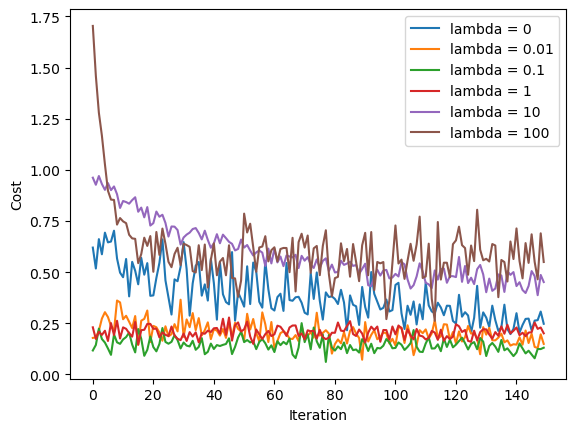

In [16]:
IRIS = pd.read_csv('IRIS.csv')
df=pd.DataFrame(IRIS)
df = prepare_data(df)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species_setosa'].values 
theta = np.zeros(X.shape[1])
alpha = 0.01
iterations = 150
batch_size = 10
lamda_list = [0, 0.01, 0.1, 1, 10, 100]
theta, cost_history_list = test_lamda(X, y, theta, alpha, iterations, batch_size, lamda_list)

#print based on lamda
for i in range(len(lamda_list)):
    print('lamda = ' + str(lamda_list[i]))
    print('theta = ' + str(theta))
    print('cost = ' + str(cost_history_list[i][-1]))
    print()

for i in range(len(lamda_list)):
    plt.plot(cost_history_list[i], label='lambda = ' + str(lamda_list[i]))
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

    The lambda is the regularization parameter. It is used to prevent overfitting. From the graph above, we can see that the cost is increasing when the lambda is increasing. It means that the model is overfitting when the lambda is increasing.

*So the best lambda is **0.01** because it has the lowest cost.*

7. *[1 point]* Test to see the effect of sampling proportion in Task 5.

In [17]:
def test_batch_size(X, y, theta, alpha, iterations, batch_size_list, lamda):
    cost_history_list = []
    for batch_size in batch_size_list:
        theta, cost_history = stochastic_gradient_descent(X, y, theta, lamda, alpha, iterations, batch_size)
        cost_history_list.append(cost_history)
    return theta, cost_history_list

Best batch size:  1


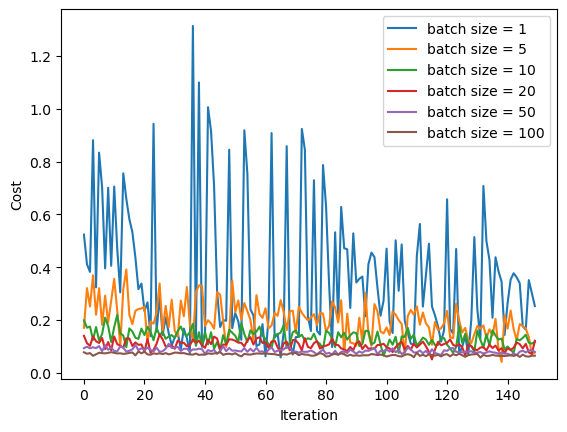

In [18]:
IRIS = pd.read_csv('IRIS.csv')
df=pd.DataFrame(IRIS)
df = prepare_data(df)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species_setosa'].values
theta = np.zeros(X.shape[1])
lamda = 0.01
alpha = 0.01
iterations = 150
batch_size_list = [1, 5, 10, 20, 50, 100]
theta, cost_history_list = test_batch_size(X, y, theta, alpha, iterations, batch_size_list, lamda)

best_batch_size = batch_size_list[np.argmin([len(cost_history) for cost_history in cost_history_list])]
print('Best batch size: ', best_batch_size)

for i in range(len(batch_size_list)):
    plt.plot(cost_history_list[i], label='batch size = ' + str(batch_size_list[i]))
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

    The batch_size is the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need. The lower the batch size, the less accurate the estimate of the gradient will be. 

*batch size = 1 because it is the best fit for the dataset and the cost is also less.*

    here's how stochastic gradient descent works

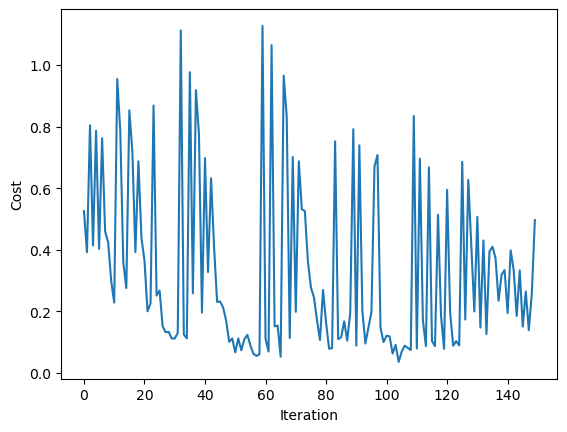

In [19]:
IRIS = pd.read_csv('IRIS.csv')
df=pd.DataFrame(IRIS)
df = prepare_data(df)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species_setosa'].values
theta = np.zeros(X.shape[1])
lamda = 0.01
alpha = 0.01
iterations = 150
batch_size = 1
theta, cost_history = stochastic_gradient_descent(X, y, theta, lamda, alpha, iterations, batch_size)

plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

    from all the above we can see that the best batch size is 1 and the best lamda is 0.01 So, we will use these values to train our model and predict the species of the flower


In [23]:
IRIS = pd.read_csv('IRIS.csv')
df=pd.DataFrame(IRIS)
df = prepare_data(df)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df['species_setosa'].values
theta = np.zeros(X.shape[1])
lamda = 0.01
alpha = 0.01
iterations = 1500
batch_size = 1
theta, cost_history = stochastic_gradient_descent(X, y, theta, lamda, alpha, iterations, batch_size)

def predict(X, theta):
    return np.round(sigmoid(X.dot(theta)))

y_pred = predict(X, theta)
y_pred


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
def accuracy(y_pred, y):
    return (y_pred == y).mean()

accuracy_score = accuracy(y_pred, y)
print(f"Accuracy of the model: {accuracy_score:.2%}")


Accuracy of the model: 100.00%


---